In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-1.csv'
df2 = pd.read_csv(url)

In [ ]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [ ]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [ ]:
df4 = df4.dropna()
df4.shape

(1804, 16)

In [ ]:
df4['playlist_id'].value_counts()

3ykXidKLz1eYPvuGoFlD1e    17
37i9dQZF1DWUFmyho2wkQU    15
4NlAd9NpIa92IjErMyAriM    13
44bkJI1QGkT2O0GYJSsbkp    12
7nHgmv7uyIA1KHj6qTttjH    12
                          ..
6k45gxiQhfVqACfIdqONsC     1
37i9dQZF1DWUlCmB8llCTB     1
3opIxv3Y5GmXDNpbLFZxIm     1
5ifDekrUt5lbSIMTSzNNqB     1
37i9dQZF1DWWQRwui0ExPn     1
Name: playlist_id, Length: 413, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [ ]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [ ]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [ ]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [ ]:
df5.head(2)

,track_popularity,instrumentalness,loudness,key,speechiness,acousticness,danceability,liveness,tempo,energy,valence,emotion
0,41.0,0.01170,10.068,2.0,0.0236,0.2790,0.682,0.0887,97.091,0.401,0.566,6
1,28.0,0.00994,4.739,9.0,0.0442,0.0117,0.303,0.3470,135.225,0.880,0.404,1


In [ ]:
#cols = ['language', 'playlist_genre']
#df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df11 = df5

In [ ]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [ ]:
df12 = df11.set_index('track_name')

In [ ]:
#testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
#testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
#testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [ ]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1804, 11)

In [ ]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [ ]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [ ]:
df5.shape
scaler = MinMaxScaler()

In [ ]:
df5['emotion'].value_counts()

1     609
3     228
6     215
2     165
7     150
5     138
4     126
8      64
10     57
9      52
Name: emotion, dtype: int64

In [ ]:
train_data_001 = df5.iloc[:1600,2:10]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_01.shape

(1600, 8)

In [ ]:
train_data_001.columns

Index(['loudness', 'key', 'speechiness', 'acousticness', 'danceability',
       'liveness', 'tempo', 'energy'],
      dtype='object')

In [ ]:
testdf1_2 = testdf1_1.iloc[:1600,2:10]
testdf2_2 = testdf2_1.iloc[:1600,2:10]
testdf3_2 = testdf3_1.iloc[:1600,2:10]
df13 = df12.iloc[:1600,2:10]

In [ ]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [ ]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [ ]:
batch_size = 40
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 40),
            nn.ReLU(),
            nn.Linear(40, 80),
            nn.ReLU(),
            nn.Linear(80, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [ ]:
#len(labels[0])

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.9010264277458191
Epoch: 0 Loss G.: 1.2438819408416748
Epoch: 10 Loss D.: 0.6079765558242798
Epoch: 10 Loss G.: 1.133025050163269
Epoch: 20 Loss D.: 0.37234747409820557
Epoch: 20 Loss G.: 1.0915427207946777
Epoch: 30 Loss D.: 0.765001118183136
Epoch: 30 Loss G.: 1.1064444780349731
Epoch: 40 Loss D.: 0.561536431312561
Epoch: 40 Loss G.: 1.4387601613998413
Epoch: 50 Loss D.: 0.32820701599121094
Epoch: 50 Loss G.: 1.4092297554016113
Epoch: 60 Loss D.: 0.53559410572052
Epoch: 60 Loss G.: 1.6166441440582275
Epoch: 70 Loss D.: 0.47523197531700134
Epoch: 70 Loss G.: 1.0312381982803345
Epoch: 80 Loss D.: 0.5497444868087769
Epoch: 80 Loss G.: 1.0071804523468018
Epoch: 90 Loss D.: 0.5379372835159302
Epoch: 90 Loss G.: 0.8630377650260925
Epoch: 100 Loss D.: 0.528359591960907
Epoch: 100 Loss G.: 1.0275170803070068
Epoch: 110 Loss D.: 0.6752080321311951
Epoch: 110 Loss G.: 0.7174069285392761
Epoch: 120 Loss D.: 0.6010719537734985
Epoch: 120 Loss G.: 0.7959330677986145
Epoch: 130 

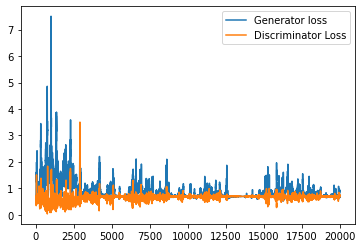

In [ ]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [ ]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [ ]:
latent_space_samples[:10]

tensor([[0.8776, 0.7871, 0.1404, 0.7267, 0.6187, 0.8891, 0.5707, 0.1755],
        [0.6976, 0.3364, 0.2046, 0.0656, 0.4807, 0.0614, 0.4100, 0.8663],
        [0.2492, 0.3146, 0.9859, 0.6595, 0.4537, 0.7076, 0.1307, 0.8029],
        [0.7185, 0.1383, 0.0667, 0.7341, 0.8833, 0.9916, 0.6284, 0.6945],
        [0.0540, 0.3981, 0.2119, 0.9805, 0.0636, 0.4916, 0.8204, 0.7776],
        [0.1646, 0.0997, 0.3825, 0.3623, 0.3177, 0.9469, 0.2281, 0.8295],
        [0.6461, 0.6472, 0.3074, 0.5903, 0.2640, 0.7108, 0.2921, 0.9435],
        [0.4138, 0.4372, 0.6090, 0.1092, 0.9531, 0.9340, 0.5776, 0.2962],
        [0.8151, 0.3543, 0.1079, 0.9864, 0.4438, 0.1171, 0.6566, 0.3956],
        [0.6362, 0.4125, 0.4348, 0.4905, 0.5694, 0.1168, 0.3204, 0.7446]])

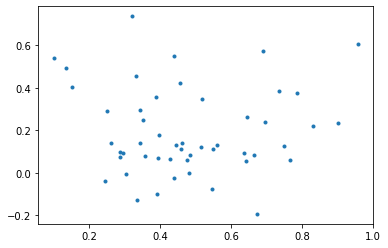

In [ ]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [ ]:
from scipy.spatial import distance

In [ ]:
float_x = real_samples[0].double()

In [ ]:
float_x = list(float_x.numpy())

In [ ]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.278


In [ ]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [ ]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [ ]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [ ]:
def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  cos_name.append(rec_idx)
  rec_len = len(recommended)
  results1.append(['index:',rec_idx,'; cos sim:',rec_score])

In [ ]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  euc_name.append(rec_idx)
  rec_len = len(recommended)
  results2.append(['index:',rec_idx,'; euclid sim:',rec_score])

In [ ]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 0.745


In [ ]:
# pick recommendations with cosine similarity
results1 =[]
cos_name =[]
rec_cos = []
for i in generated_vals2:
  a = cos_similarity(i,train_data_vals2)

In [ ]:
cols2 = ['language']
cos_rec =  df4[df4['track_name'].isin(cos_name)]
cos_rec2 = cos_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#cos_rec2[cols2] = cos_rec2[cols2].apply(LabelEncoder().fit_transform)
cos_rec3 = cos_rec2.iloc[:1600,2:10]

In [ ]:
cos_rec4=[]
for i, j in cos_rec3.iterrows():
  cos_rec4.append(j.values)

In [ ]:
cos_rec3['track_name'] = df4['track_name']
cos_rec5 = cos_rec3.set_index('track_name')

In [ ]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [ ]:
# pick recommendations with euclidean similarity
results2 =[]
euc_name =[]
rec_euc = []
for i in generated_vals2:
  a = euclid_similarity(i,train_data_vals2)

In [ ]:
euc_rec =  df4[df4['track_name'].isin(euc_name)]
euc_rec2 = euc_rec.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
#euc_rec2[cols2] = euc_rec2[cols2].apply(LabelEncoder().fit_transform)
euc_rec3 = euc_rec2.iloc[:1600,2:10]

In [ ]:
euc_rec4=[]
for i, j in euc_rec3.iterrows():
  euc_rec4.append(j.values)

In [ ]:
euc_rec3['track_name'] = df4['track_name']
euc_rec5 = euc_rec3.set_index('track_name')

In [ ]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [ ]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [ ]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct1_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [ ]:
#compare recomendations to test subjects
cost1_name = []
rec_cosT1 = []
for i in test_data1:
  a = cos_similarity_t1(i,cos_rec4)

len train data: 49 ; index: Heaven ; cos sim: [[0.9999512]]
len train data: 49 ; index: English Breakfast ; cos sim: [[0.9993808]]
len train data: 49 ; index: Ignition (Remix) ; cos sim: [[0.99993352]]
len train data: 49 ; index: Girlfriend in a Coma - 2011 Remaster ; cos sim: [[0.99999645]]
len train data: 49 ; index: Sleepy Eyes ; cos sim: [[0.99995834]]
len train data: 49 ; index: Say It's Gonna Rain ; cos sim: [[0.99995314]]
len train data: 49 ; index: La Grange - 1999 Remaster ; cos sim: [[0.99999469]]
len train data: 49 ; index: If I Lose Myself - Alesso vs OneRepublic ; cos sim: [[0.99995702]]
len train data: 49 ; index: We Built This City ; cos sim: [[0.99998637]]
len train data: 49 ; index: Can't Take My Eyes off You ; cos sim: [[0.99997611]]


In [ ]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [ ]:
euct1_name = []
rec_eucT1 = []
for i in test_data1:
  a = euclid_similarity_t1(i,euc_rec4)

len train data: 49 ; index: One More Time ; euclid sim: 3.573735850619064
len train data: 49 ; index: Brothers ; euclid sim: 4.229730785759304
len train data: 49 ; index: All Day All Night ; euclid sim: 3.7544874457107964
len train data: 49 ; index: Brothers ; euclid sim: 1.2520134264455758
len train data: 49 ; index: Disrespectful ; euclid sim: 8.449786580145085
len train data: 49 ; index: Urgent ; euclid sim: 4.829700208087455
len train data: 49 ; index: Shuttin It Down ; euclid sim: 4.225039591873665
len train data: 49 ; index: Disrespectful ; euclid sim: 6.419851731153899
len train data: 49 ; index: Bienvenidos - Live ; euclid sim: 3.623927923455442
len train data: 49 ; index: Heaven - Radio Edit ; euclid sim: 3.184861180648238


In [ ]:
euct1_name

['One More Time',
 'Brothers',
 'All Day All Night',
 'Brothers',
 'Disrespectful',
 'Urgent',
 'Shuttin It Down',
 'Disrespectful',
 'Bienvenidos - Live',
 'Heaven - Radio Edit']

In [ ]:
rec_eucT1

[3.573735850619064,
 4.229730785759304,
 3.7544874457107964,
 1.2520134264455758,
 8.449786580145085,
 4.829700208087455,
 4.225039591873665,
 6.419851731153899,
 3.623927923455442,
 3.184861180648238]

In [ ]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct2_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [ ]:
#compare recomendations to test subjects
cost2_name = []
rec_cosT2 = []
for i in test_data2:
  a = cos_similarity_t2(i,cos_rec4)

len train data: 49 ; index: Heavy, California ; cos sim: [[0.99996843]]
len train data: 49 ; index: English Breakfast ; cos sim: [[0.99995954]]
len train data: 49 ; index: Say It's Gonna Rain ; cos sim: [[0.99971094]]
len train data: 49 ; index: Into the Sea ; cos sim: [[0.99997698]]
len train data: 49 ; index: My Death ; cos sim: [[0.99850764]]
len train data: 49 ; index: Ignition (Remix) ; cos sim: [[0.99995809]]
len train data: 49 ; index: DÃ©jame Volar ; cos sim: [[0.99926541]]
len train data: 49 ; index: English Breakfast ; cos sim: [[0.9999457]]
len train data: 49 ; index: BenÃ© ; cos sim: [[0.9999203]]
len train data: 49 ; index: Toumast Tincha ; cos sim: [[0.99981901]]
len train data: 49 ; index: Unterwegs ; cos sim: [[0.99948955]]
len train data: 49 ; index: He Said She Said ; cos sim: [[0.99999797]]
len train data: 49 ; index: Stairway To Heaven ; cos sim: [[0.99956499]]
len train data: 49 ; index: It's Strange (feat. K.Flay) ; cos sim: [[0.99949015]]
len train data: 49 ; ind

In [ ]:
cost2_name

['Heavy, California',
 'English Breakfast',
 "Say It's Gonna Rain",
 'Into the Sea',
 'My Death',
 'Ignition (Remix)',
 'DÃ©jame Volar',
 'English Breakfast',
 'BenÃ©',
 'Toumast Tincha',
 'Unterwegs',
 'He Said She Said',
 'Stairway To Heaven',
 "It's Strange (feat. K.Flay)",
 'If I Lose Myself - Alesso vs OneRepublic',
 'Heaven',
 "Say It's Gonna Rain"]

In [ ]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [ ]:
euct2_name = []
rec_eucT2 = []
for i in test_data2:
  a = euclid_similarity_t2(i,euc_rec4)

len train data: 49 ; index: Girlfriend in a Coma - 2011 Remaster ; euclid sim: 3.507878880463233
len train data: 49 ; index: Just A Lover - Pomo Remix ; euclid sim: 4.149998242168298
len train data: 49 ; index: Into You (feat. Tamia) - Radio Edit ; euclid sim: 4.309590393529296
len train data: 49 ; index: Just A Lover - Pomo Remix ; euclid sim: 1.8821733102985008
len train data: 49 ; index: Come Back To Me ; euclid sim: 7.887833898479356
len train data: 49 ; index: With You - Frank Walker Remix ; euclid sim: 2.5150058875477885
len train data: 49 ; index: Just A Lover - Pomo Remix ; euclid sim: 6.13216307676174
len train data: 49 ; index: Just A Lover - Pomo Remix ; euclid sim: 2.7284642280227898
len train data: 49 ; index: If I Had No Loot ; euclid sim: 4.666162728624021
len train data: 49 ; index: Dear Mama ; euclid sim: 2.446517067179375
len train data: 49 ; index: Cemetry Gates - 2011 Remaster ; euclid sim: 4.209385515357318
len train data: 49 ; index: QuÃ©date ; euclid sim: 2.98450

In [ ]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = cos_rec5.index[rec_index]
  cost3_name.append(rec_idx) 
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = euc_rec5.index[rec_index]
  euct3_name.append(rec_idx)
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [ ]:
#compare recomendations to test subjects
cost3_name = []
rec_cosT3 = []
for i in test_data3:
  a = cos_similarity_t3(i,cos_rec4)

len train data: 49 ; index: Heaven ; cos sim: [[0.99993729]]
len train data: 49 ; index: Hideaway ; cos sim: [[0.99985482]]
len train data: 49 ; index: Uhh Ahh ; cos sim: [[0.99997222]]
len train data: 49 ; index: Flames (feat. Ruel) ; cos sim: [[0.99999493]]
len train data: 49 ; index: Ignition (Remix) ; cos sim: [[0.99993942]]
len train data: 49 ; index: Ignition (Remix) ; cos sim: [[0.99994027]]
len train data: 49 ; index: Heaven ; cos sim: [[0.99995765]]
len train data: 49 ; index: We Built This City ; cos sim: [[0.99997689]]
len train data: 49 ; index: Heaven ; cos sim: [[0.99994058]]
len train data: 49 ; index: Say It's Gonna Rain ; cos sim: [[0.99972139]]
len train data: 49 ; index: BenÃ© ; cos sim: [[0.99943943]]


In [ ]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [ ]:
euct3_name = []
rec_eucT3 = []
for i in test_data3:
  a = euclid_similarity_t3(i,euc_rec4)

len train data: 49 ; index: Bandit ; euclid sim: 2.1675759271591852
len train data: 49 ; index: Reach (NBC Olympic Version) ; euclid sim: 8.510942211059822
len train data: 49 ; index: Heaven - Radio Edit ; euclid sim: 0.3781151676407605
len train data: 49 ; index: My Nigga ; euclid sim: 3.1556383122951566
len train data: 49 ; index: With You - Frank Walker Remix ; euclid sim: 2.169603274794726
len train data: 49 ; index: Bienvenidos - Live ; euclid sim: 6.363394012191926
len train data: 49 ; index: i hate u, i love u (feat. olivia o'brien) - Deepend Remix ; euclid sim: 3.0122939547793144
len train data: 49 ; index: One More Night ; euclid sim: 3.0581301836252828
len train data: 49 ; index: Brothers ; euclid sim: 3.184717799115009
len train data: 49 ; index: When I Was Your Man ; euclid sim: 3.166669422279505
len train data: 49 ; index: If I Had No Loot ; euclid sim: 5.287012110824034


In [ ]:
rec_coseT1.extend(rec_coseT2)

In [ ]:
rec_coseT1.extend(rec_coseT3)

In [ ]:
print(rec_coseT1)

[0.9999512040609467, 0.9993807982076168, 0.9999335195252643, 0.9999964485888434, 0.9999583379614783, 0.9999531440920146, 0.9999946864045974, 0.9999570169052902, 0.9999863683546404, 0.999976112835899, 0.9999684348117172, 0.9999595393470766, 0.9997109383660924, 0.9999769774024841, 0.9985076376311334, 0.9999580947521992, 0.999265408425437, 0.9999457006082145, 0.9999203023784414, 0.9998190051782508, 0.9994895481250785, 0.9999979674338006, 0.9995649895049341, 0.999490149389515, 0.9999218768722289, 0.9995898698866995, 0.9988082558018733, 0.9999372911226082, 0.9998548225996968, 0.999972222455516, 0.9999949287543248, 0.999939421104531, 0.9999402691958474, 0.999957649059515, 0.9999768910550941, 0.9999405835713707, 0.9997213904357153, 0.9994394257439952]


In [ ]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [ ]:
print(rec_eucT1)

[3.573735850619064, 4.229730785759304, 3.7544874457107964, 1.2520134264455758, 8.449786580145085, 4.829700208087455, 4.225039591873665, 6.419851731153899, 3.623927923455442, 3.184861180648238, 3.507878880463233, 4.149998242168298, 4.309590393529296, 1.8821733102985008, 7.887833898479356, 2.5150058875477885, 6.13216307676174, 2.7284642280227898, 4.666162728624021, 2.446517067179375, 4.209385515357318, 2.98450054280444, 3.8558656174716517, 6.2324976678696, 5.6025814725088985, 6.102576083098023, 10.861035030327455, 2.1675759271591852, 8.510942211059822, 0.3781151676407605, 3.1556383122951566, 2.169603274794726, 6.363394012191926, 3.0122939547793144, 3.0581301836252828, 3.184717799115009, 3.166669422279505, 5.287012110824034]


In [ ]:
import itertools
euclidean_stats = list(itertools.chain(rec_eucT1,rec_eucT2,rec_eucT3))
cosine_stats = list(itertools.chain(rec_coseT1,rec_coseT2,rec_coseT3))

In [ ]:
euclidean_stats

[3.573735850619064,
 4.229730785759304,
 3.7544874457107964,
 1.2520134264455758,
 8.449786580145085,
 4.829700208087455,
 4.225039591873665,
 6.419851731153899,
 3.623927923455442,
 3.184861180648238,
 3.507878880463233,
 4.149998242168298,
 4.309590393529296,
 1.8821733102985008,
 7.887833898479356,
 2.5150058875477885,
 6.13216307676174,
 2.7284642280227898,
 4.666162728624021,
 2.446517067179375,
 4.209385515357318,
 2.98450054280444,
 3.8558656174716517,
 6.2324976678696,
 5.6025814725088985,
 6.102576083098023,
 10.861035030327455,
 2.1675759271591852,
 8.510942211059822,
 0.3781151676407605,
 3.1556383122951566,
 2.169603274794726,
 6.363394012191926,
 3.0122939547793144,
 3.0581301836252828,
 3.184717799115009,
 3.166669422279505,
 5.287012110824034,
 3.507878880463233,
 4.149998242168298,
 4.309590393529296,
 1.8821733102985008,
 7.887833898479356,
 2.5150058875477885,
 6.13216307676174,
 2.7284642280227898,
 4.666162728624021,
 2.446517067179375,
 4.209385515357318,
 2.984500

In [ ]:
cosine_stats

[0.9999512040609467,
 0.9993807982076168,
 0.9999335195252643,
 0.9999964485888434,
 0.9999583379614783,
 0.9999531440920146,
 0.9999946864045974,
 0.9999570169052902,
 0.9999863683546404,
 0.999976112835899,
 0.9999684348117172,
 0.9999595393470766,
 0.9997109383660924,
 0.9999769774024841,
 0.9985076376311334,
 0.9999580947521992,
 0.999265408425437,
 0.9999457006082145,
 0.9999203023784414,
 0.9998190051782508,
 0.9994895481250785,
 0.9999979674338006,
 0.9995649895049341,
 0.999490149389515,
 0.9999218768722289,
 0.9995898698866995,
 0.9988082558018733,
 0.9999372911226082,
 0.9998548225996968,
 0.999972222455516,
 0.9999949287543248,
 0.999939421104531,
 0.9999402691958474,
 0.999957649059515,
 0.9999768910550941,
 0.9999405835713707,
 0.9997213904357153,
 0.9994394257439952,
 0.9999684348117172,
 0.9999595393470766,
 0.9997109383660924,
 0.9999769774024841,
 0.9985076376311334,
 0.9999580947521992,
 0.999265408425437,
 0.9999457006082145,
 0.9999203023784414,
 0.9998190051782508,

In [ ]:
EMrec_eucT1 = [2.136843399152123, 1.0653933029637461, 1.9697226327582233, 3.121205299239379, 1.2238199254792346, 1.9120460234000534, 0.0, 2.3558988348399117, 0.0, 1.375095014898964, 2.549076193074652, 1.4183007614747978, 1.6935145703536112, 1.572704807012433, 0.8140949637480789, 0.8951894539146443, 2.036887822144362, 1.5665554454279618, 1.1827994800472312, 1.3525843559645372, 2.208623041263498, 0.35951267015224825, 3.2997775455324283, 1.7003965537485755, 6.59356102439342, 3.0501334413431818, 1.318663406635655, 1.063355302803335, 0.3620314903430365, 1.0149487918116757, 2.0333976200008204, 1.5653104356644476, 5.435379379583356, 2.051496290515783, 3.300246380196482, 3.3088163230980365, 2.2690441577897995, 5.200865024983832]

In [ ]:
NMrec_coseT1 = [0.9999932487667178, 0.9999967215831126, 0.9999933745520302, 0.9999795860425241, 0.9999879469873235, 0.9999889343896217, 0.9999984166143743, 1.0000000000000002, 0.9999971002493233, 0.9999848761899961, 0.9999809979599981, 0.9999947548279028, 0.9999948619636779, 0.9999975161257679, 0.999981209047114, 0.9999936176253443, 0.9999897789176083, 0.9999858330464003, 0.9999947701079364, 0.9999712959469053, 0.9999821019273762, 0.9999946407075987, 0.999995156413043, 0.9999866710780829, 0.9999988606098704, 0.9999643377538886, 0.9999794144009473, 0.9999891105620674, 0.9999990417444762, 0.9999930197849295, 0.9999959817335284, 0.999994307563816, 0.999986825204495, 0.9999968618587575, 0.9999844313947372, 0.9999849360413169, 0.9999971323342577, 0.9999698646143627]

In [ ]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_eucT1, EMrec_eucT1)
print('pvalue < 0.05 means not equal variance, pvalue:' ,p)

pvalue < 0.05 means not equal variance, pvalue: 0.04151014268051305


In [ ]:
from scipy import stats
#stats.ttest_ind(rec_eucT1, EMrec_eucT1,equal_var = False)
stats.ttest_rel(rec_eucT1, EMrec_eucT1)

Ttest_relResult(statistic=5.672069411103882, pvalue=1.7461875654621192e-06)

In [ ]:
# leven test for equal variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_coseT1, NMrec_coseT1)
print('pvalue > 0.01 means equal variance, pvalue:' ,p)

pvalue > 0.01 means equal variance, pvalue: 0.000783110822659048


In [ ]:
import scipy.stats as stats
#stats.ttest_ind(rec_coseT1, b=NMrec_coseT1, equal_var=False)
stats.ttest_rel(rec_coseT1, b=NMrec_coseT1)

Ttest_relResult(statistic=-3.859051349025752, pvalue=0.000440486697235496)

In [ ]:
print(len(rec_eucT1))
print(len(rec_coseT1))

38
38


The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0331) is less than alpha = 0.05, we reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.

In [ ]:
testing34 = testdf1.iloc[:,[0,2]]
testing34

,track_name,track_artist
136,I Dare You,The xx
186,Howling,RY X
286,Lower,TENDER
393,Prettiest Virgin (Radio Edit),Agar Agar
429,Love Is a Bitch,Two Feet
451,Song For You,Rhye
473,Afternoon,TENDER
559,Jungle,Tash Sultana
1012,Tainted,TENDER
1089,Un autre que moi,Fishbach


In [ ]:
testing35 = testdf2.iloc[:,[0,2]]
testing35

,track_name,track_artist
7,Tender Lover,Babyface
162,I'm Dreamin',Christopher Williams
194,I Adore Mi Amor,Color Me Badd
207,Miss You Much,Janet Jackson
410,When Can I See You,Babyface
449,Rump Shaker,Wreckx-N-Effect
563,Lyte as a Rock,MC Lyte
622,Poison,Bell Biv DeVoe
781,My Prerogative,Bobby Brown
803,Cha Cha Cha,MC Lyte


In [ ]:
testing36 = testdf3.iloc[:,[0,2]]
testing36

,track_name,track_artist
85,On Fire,Carmada
211,Hall & Oates,Satchmode
309,Sway - Chainsmokers Remix,Anna of the North
463,Feel It All Around,Washed Out
474,Ghost - Lost Kings Remix,Halsey
500,Cool Blue,The Japanese House
538,Anywhere We Go,Kaptan
923,Indecision,Shura
929,Loudspeaker,MUNA
1279,Classic (feat. POWERS) - POWERS Sunset Version,The Knocks


In [ ]:
df1_rec =  df4[df4['track_name'].isin(euct1_name)]
df2_rec =  df4[df4['track_name'].isin(euct2_name)]
df3_rec =  df4[df4['track_name'].isin(euct3_name)]
dfc1_rec =  df4[df4['track_name'].isin(cost1_name)]
dfc2_rec =  df4[df4['track_name'].isin(cost2_name)]
dfc3_rec =  df4[df4['track_name'].isin(cost3_name)]

In [ ]:
testing37 = df1_rec.iloc[:,[0,2]]
testing37_dict = dict(zip(testing37.track_name, testing37.track_artist))
eucdf1 = pd.DataFrame(euct1_name)
eucdf1['artist'] = eucdf1[0].map(testing37_dict)
eucdf1

,0,artist
0,One More Time,Daft Punk
1,Brothers,Bankrol Hayden
2,All Day All Night,Bobby Brown
3,Brothers,Bankrol Hayden
4,Disrespectful,GASHI
5,Urgent,Foreigner
6,Shuttin It Down,Maddix
7,Disrespectful,GASHI
8,Bienvenidos - Live,Miguel Rios
9,Heaven - Radio Edit,INNA


In [ ]:
testing38 = df2_rec.iloc[:,[0,2]]
testing38_dict = dict(zip(testing38.track_name, testing38.track_artist))
eucdf2 = pd.DataFrame(euct2_name)
eucdf2['artist'] = eucdf2[0].map(testing38_dict)
eucdf2

,0,artist
0,Girlfriend in a Coma - 2011 Remaster,The Smiths
1,Just A Lover - Pomo Remix,Hayden James
2,Into You (feat. Tamia) - Radio Edit,Fabolous
3,Just A Lover - Pomo Remix,Hayden James
4,Come Back To Me,Janet Jackson
5,With You - Frank Walker Remix,Tyler Shaw
6,Just A Lover - Pomo Remix,Hayden James
7,Just A Lover - Pomo Remix,Hayden James
8,If I Had No Loot,Tony! Toni! TonÃ©!
9,Dear Mama,2Pac


In [ ]:
testing39 = df3_rec.iloc[:,[0,2]]
testing39_dict = dict(zip(testing39.track_name, testing39.track_artist))
eucdf3 = pd.DataFrame(euct3_name)
eucdf3['artist'] = eucdf3[0].map(testing39_dict)
eucdf3

,0,artist
0,Bandit,Hemso
1,Reach (NBC Olympic Version),Gloria Estefan
2,Heaven - Radio Edit,INNA
3,My Nigga,YG
4,With You - Frank Walker Remix,Tyler Shaw
5,Bienvenidos - Live,Miguel Rios
6,"i hate u, i love u (feat. olivia o'brien) - De...",gnash
7,One More Night,Michael Kiwanuka
8,Brothers,Bankrol Hayden
9,When I Was Your Man,Bruno Mars


In [ ]:
testing40 = dfc1_rec.iloc[:,[0,2]]
testing40_dict = dict(zip(testing40.track_name, testing40.track_artist))
cosdf1 = pd.DataFrame(cost1_name)
cosdf1['artist'] = cosdf1[0].map(testing40_dict)
cosdf1

,0,artist
0,Heaven,Bryan Adams
1,English Breakfast,Jobii
2,Ignition (Remix),R. Kelly
3,Girlfriend in a Coma - 2011 Remaster,The Smiths
4,Sleepy Eyes,Elohim
5,Say It's Gonna Rain,Will To Power
6,La Grange - 1999 Remaster,ZZ Top
7,If I Lose Myself - Alesso vs OneRepublic,OneRepublic
8,We Built This City,Starship
9,Can't Take My Eyes off You,Frankie Valli


In [ ]:
testing41 = dfc2_rec.iloc[:,[0,2]]
testing41_dict = dict(zip(testing41.track_name, testing41.track_artist))
cosdf2 = pd.DataFrame(cost2_name)
cosdf2['artist'] = cosdf2[0].map(testing41_dict)
cosdf2

,0,artist
0,"Heavy, California",Jungle
1,English Breakfast,Jobii
2,Say It's Gonna Rain,Will To Power
3,Into the Sea,Wave Wave
4,My Death,Scott Walker
5,Ignition (Remix),R. Kelly
6,DÃ©jame Volar,Aleman
7,English Breakfast,Jobii
8,BenÃ©,PNL
9,Toumast Tincha,Tinariwen


In [ ]:
testing42 = dfc3_rec.iloc[:,[0,2]]
testing42_dict = dict(zip(testing42.track_name, testing42.track_artist))
cosdf3 = pd.DataFrame(cost3_name)
cosdf3['artist'] = cosdf3[0].map(testing42_dict)
cosdf3

,0,artist
0,Heaven,Bryan Adams
1,Hideaway,Kiesza
2,Uhh Ahh,Boyz II Men
3,Flames (feat. Ruel),SG Lewis
4,Ignition (Remix),R. Kelly
5,Ignition (Remix),R. Kelly
6,Heaven,Bryan Adams
7,We Built This City,Starship
8,Heaven,Bryan Adams
9,Say It's Gonna Rain,Will To Power


In [ ]:
def oneslistmaker(n):
    listofones = [1] * n
    return listofones

In [ ]:
#classification report with emotion model cosine distance
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix 
y_true = oneslistmaker(32)
y_pred = [0,0,1,0,0,0,1,0	,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1]
conf_matrix1 = confusion_matrix(y_true=y_true, y_pred=y_pred)

print('Cosine similarrity model accuracy with emotion:',accuracy_score(y_true, y_pred))

Cosine similarrity model accuracy with emotion: 0.25


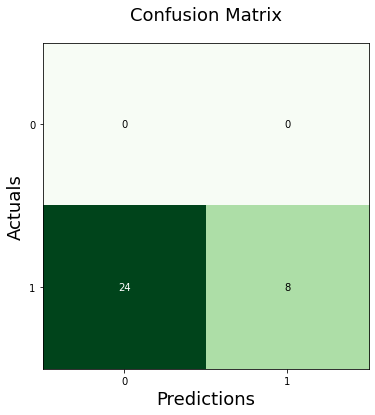

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
#f = sns.heatmap(cm, annot=True)

In [ ]:
#classification report with emotion model euclidean distance
target_names = oneslistmaker(32)
y_true = oneslistmaker(32)
y_pred = [1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1]
conf_matrix2 = confusion_matrix(y_true=y_true, y_pred=y_pred)
print('Euclidean distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Euclidean distance model accuracy with emotion: 0.65625


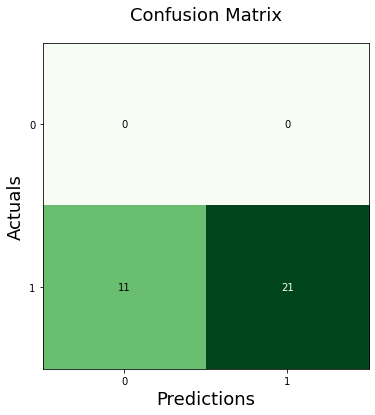

In [ ]:
#confusion matrix with emotion model for the euclidean distance
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#classification report with no emotion model cosine similarity
from sklearn.metrics import accuracy_score
y_true = oneslistmaker(32)
y_pred = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0]
print('Cosine distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Cosine distance model accuracy with emotion: 0.1875


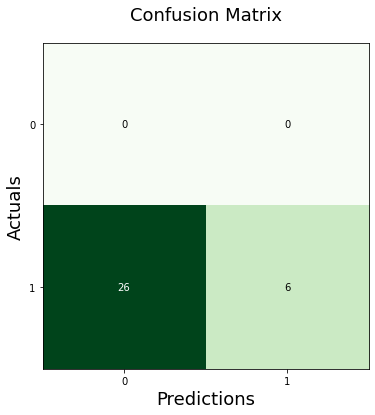

In [ ]:
#confusion matrix with no emotion model for the cosine similarity
conf_matrix1 = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#classification report with no emotion model euclidean distance
#conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
target_names = oneslistmaker(32)
y_true = oneslistmaker(32)
y_pred = [1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,0]
print('Euclidean distance model accuracy with emotion:',accuracy_score(y_true, y_pred))

Euclidean distance model accuracy with emotion: 0.625


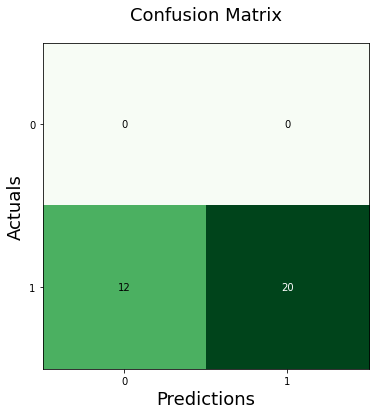

In [ ]:
#confusion matrix with no emotion model for the cosine similarity
conf_matrix2 = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
rec_cosT1[:10]

[array([[0.9999512]]),
 array([[0.9993808]]),
 array([[0.99993352]]),
 array([[0.99999645]]),
 array([[0.99995834]]),
 array([[0.99995314]]),
 array([[0.99999469]]),
 array([[0.99995702]]),
 array([[0.99998637]]),
 array([[0.99997611]])]

In [ ]:
(rec_eucT2)

[3.507878880463233,
 4.149998242168298,
 4.309590393529296,
 1.8821733102985008,
 7.887833898479356,
 2.5150058875477885,
 6.13216307676174,
 2.7284642280227898,
 4.666162728624021,
 2.446517067179375,
 4.209385515357318,
 2.98450054280444,
 3.8558656174716517,
 6.2324976678696,
 5.6025814725088985,
 6.102576083098023,
 10.861035030327455]

In [ ]:
(rec_eucT1[:10])

[3.573735850619064,
 4.229730785759304,
 3.7544874457107964,
 1.2520134264455758,
 8.449786580145085,
 4.829700208087455,
 4.225039591873665,
 6.419851731153899,
 3.623927923455442,
 3.184861180648238]